In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("Netflix Userbase.csv")

In [5]:
df=data.copy()

In [6]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
#Taking Data overview by using info
#Understanding the dat a,its type and number of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
#THE JOIN DATE AND AST PAYMENT DATE SHOULD BE IN DATE FORMATE
#converting the object type to date type 
df["Join Date"]=pd.DatetimeIndex(df["Join Date"])
df["Last Payment Date"] =pd.DatetimeIndex(df["Last Payment Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [8]:
#can see that plan duration columns has 1 month here we have considered to convert all the values
#in month to make it as numerical column.

df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In [46]:
#in plan duration columns all the values are of 1 month only so we dsent not need this 
#column in any analysis..Dropping this column

df.drop("Plan Duration",axis=1,inplace=True)

In [14]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [19]:
Total_Monthly_Revenue =df["Monthly Revenue"].sum()
print("Total_Revenue :",Total_Monthly_Revenue ,"$")

Total_Revenue : 31271 $


### Total Revenue : 31271 $

In [22]:
df.sort_values("Monthly Revenue",ascending=False)[["Monthly Revenue","User ID"]].head(10)

,Monthly Revenue,User ID
2499,15,2500
2334,15,2335
2425,15,2426
2426,15,2427
379,15,380
1648,15,1649
1647,15,1648
1645,15,1646
954,15,955
959,15,960


In [9]:
#Checking subscription type 

df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [11]:
rev_sub_type=df.groupby("Subscription Type")["Monthly Revenue"].sum()

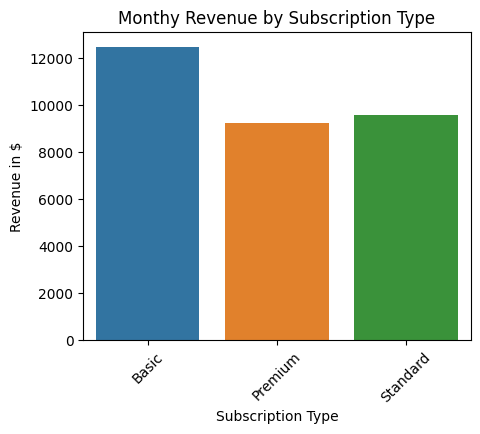

In [12]:
plt.figure(figsize=(5,4))
plt.title("Monthy Revenue by Subscription Type")
sns.barplot(x=rev_sub_type.index,y=rev_sub_type.values,
            hue=rev_sub_type.index,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [13]:
rev_countries =df.groupby("Country")["Monthly Revenue"].sum()
rev_countries

Country
Australia         2271
Brazil            2285
Canada            3950
France            2307
Germany           2260
Italy             2317
Mexico            2237
Spain             5662
United Kingdom    2318
United States     5664
Name: Monthly Revenue, dtype: int64

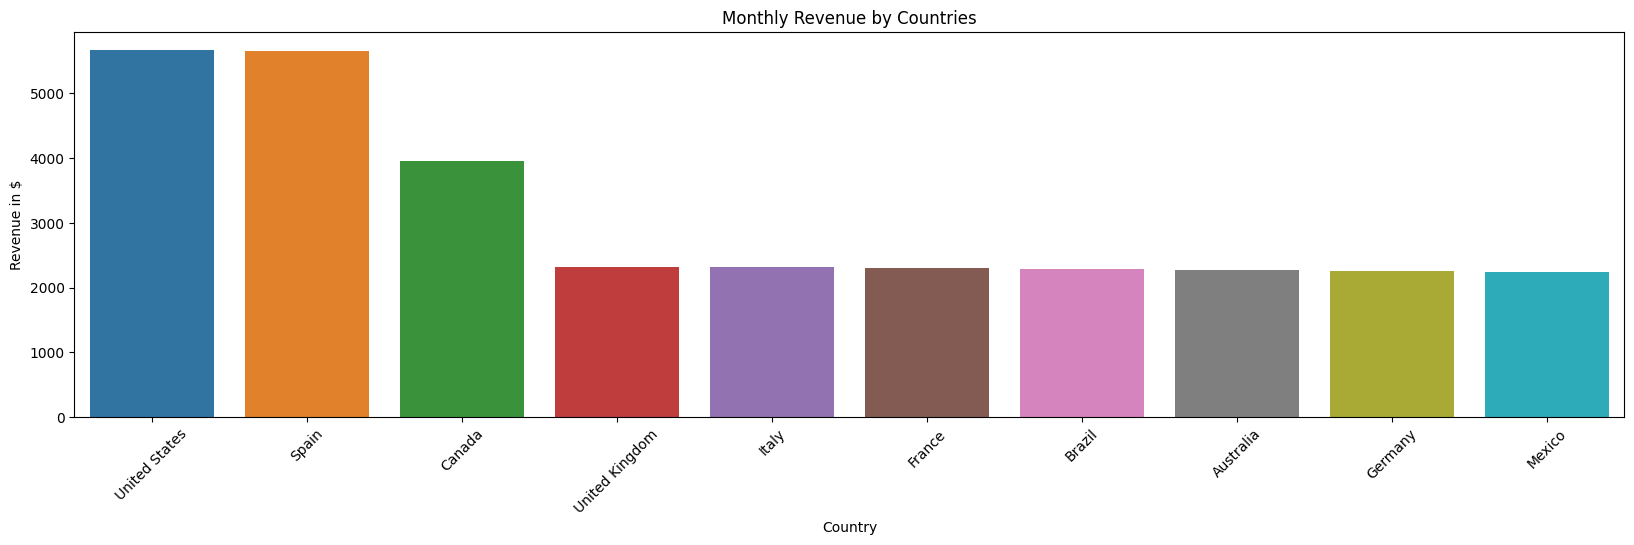

In [14]:
rev_countries=df.groupby("Country")["Monthly Revenue"].sum()
rev_countries =rev_countries.sort_values(ascending=False)



plt.figure(figsize=(20,5))
plt.title("Monthly Revenue by Countries")
sns.barplot(x=rev_countries.index,y=rev_countries.values,
            hue = rev_countries.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [44]:
df["Age"].value_counts()

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [15]:
df["Age"] = pd.cut(df["Age"], bins=3, labels=["25-34","34-42","42-51"])

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,1 Month


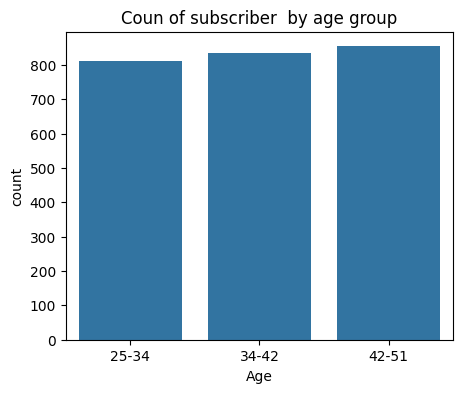

In [16]:
plt.figure(figsize=(5,4))
plt.title("Count of subscriber  by Age group")
sns.countplot(x=df["Age"])
plt.show()

In [17]:
rev_age = df.groupby("Age")["Monthly Revenue"].sum()

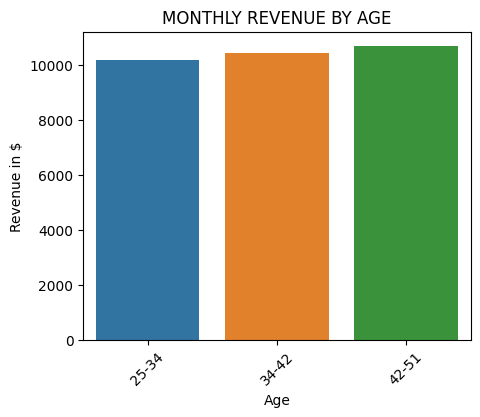

In [21]:
plt.figure(figsize=(5,4))
plt.title("MONTHLY REVENUE BY AGE")
sns.barplot(x=rev_age.index,y=rev_age.values,
            hue=rev_age.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [22]:
df["Gender"].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [24]:
rev_gender=df.groupby("Gender")["Monthly Revenue"].sum()
rev_gender

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64

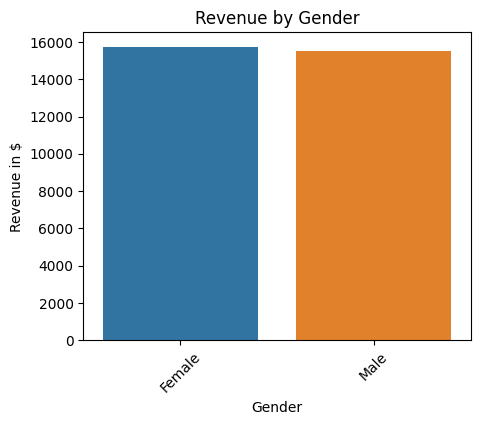

In [27]:
plt.figure(figsize=(5,4))
plt.title("Revenue by Gender")
sns.barplot(x=rev_gender.index,y=rev_gender.values,
            hue=rev_gender.index,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,1 Month


In [29]:
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [34]:
rev_device= df.groupby("Device")["Monthly Revenue"].sum()
rev_device

Device
Laptop        7994
Smart TV      7615
Smartphone    7691
Tablet        7971
Name: Monthly Revenue, dtype: int64

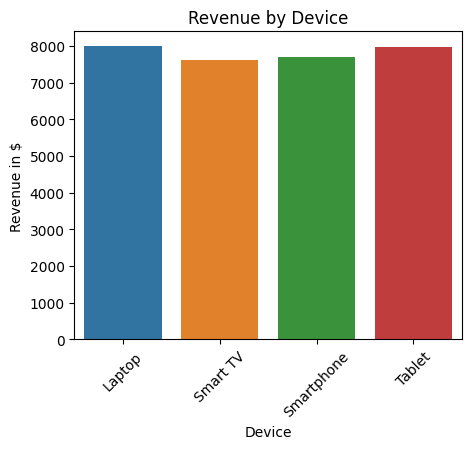

In [35]:
plt.figure(figsize=(5,4))
plt.title("Revenue by Device")
sns.barplot(x=rev_device.index,y=rev_device.values,
            hue=rev_device.index,legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation=45)
plt.show()

In [37]:
join_date = pd.to_datetime(df["Join Date"])
last_payment = pd.to_datetime(df["Last Payment Date"])

In [42]:
duration=last_payment - join_date

In [43]:
duration

0      629 days
1      774 days
2      119 days
3      262 days
4      174 days
         ...   
2495   500 days
2496   462 days
2497   310 days
2498   364 days
2499   481 days
Length: 2500, dtype: timedelta64[ns]

In [44]:
df["Duration"] = duration

In [47]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days


In [50]:
today =pd.to_datetime("2024-01-12")
last= pd.to_datetime("2024-01-01")

today-last

                 

Timedelta('11 days 00:00:00')

In [56]:
df["Duration_Month"] = df["Duration"].dt.days//30

In [57]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration,Duration_Month
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-51,Female,Laptop,262 days,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days,5


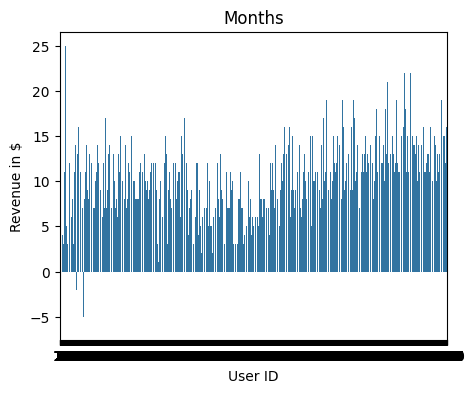

In [59]:
plt.figure(figsize=(5,4))
plt.title("Months")
sns.barplot(x=df["User ID"],y=df["Duration_Month"])
plt.ylabel("Revenue in $")
plt.show()

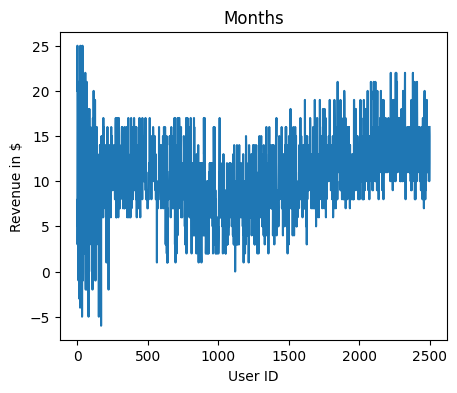

In [60]:
plt.figure(figsize=(5,4))
plt.title("Months")
sns.lineplot(x=df["User ID"],y=df["Duration_Month"])
plt.ylabel("Revenue in $")
plt.show()

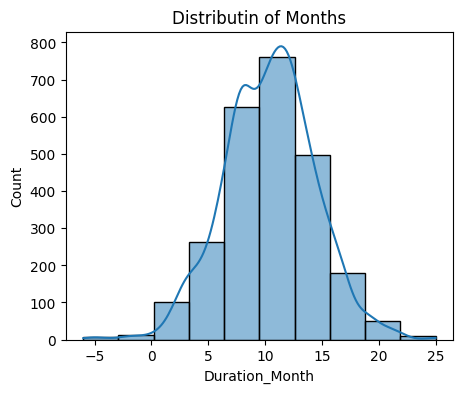

In [62]:
plt.figure(figsize=(5,4))
plt.title("Distributin of Months")
#sns.lineplot(x=df["User ID"],y=df["Duration_Month"])
sns.histplot(df["Duration_Month"], bins=10 ,kde=True)
plt.show()